In [8]:
from modules.client import OffVarianceClient
import modules.utils as utils
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

C:\Users\user\offvariance\notebooks\modules\utils.py:332: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['exp_g_total_zero'] = df['exp_g_H_zero'] + df['exp_g_A_zero']
C:\Users\user\offvariance\notebooks\modules\utils.py:333: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['exp_g_total_loc_zero'] = df['exp_g_H_loc_zero'] + df['exp_g_A_loc_zero']
C:\Users\user\offvariance\notebooks\modules\utils.py:334: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

In [9]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win1'] >= 1.8) & (games_df['odds_open_win1'] <= 2.8) &
(games_df['odds_open_tm25'] >= 2.0) & (games_df['odds_open_tm25'] <= 2.5)
]

Count: 194
Open profit: 1.6199999999999979
Close profit: 0.8499999999999965
Open ROI: 0.008350515463917515
Close ROI: 0.004381443298969054
UDI: 0.010941691921443944
AxesSubplot(0.125,0.125;0.775x0.755)


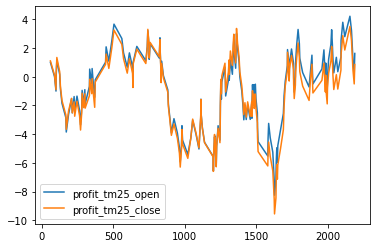

In [10]:
utils.print_total_under_result(segmented_df)

In [11]:
utils.analyze_correlation(segmented_df, 'total', utils.metrics)

,correlation
exp_g_03_A_draw,0.282329
exp_g_03_A_zero,0.242446
exp_g_A_draw,0.236549
exp_g_total_cop,0.235180
exp_g_03_A_loc_zero,0.223772
...,...
exp_g_diff_H_A_loc_cop,0.015257
exp_g_H_loc_zero,-0.015181
paper_03_H,0.013253
exp_g_03_H_loc_zero,0.012965


In [12]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_tm25')

,low,high,diff
exp_g_diff_H_A_loc_cop,0.103956,3.147068,3.043112
exp_g_diff_A_H_loc_cop,-0.103956,-3.147068,3.043112
exp_g_H_loc_cop,1.626290,4.297885,2.671595
exp_g_total_loc_cop,3.148624,5.448703,2.300079
exp_g_diff_03_A_H_loc_cop,-0.207830,-1.444541,1.236711
...,...,...,...
exp_g_diff_03_H_A_draw,0.210155,0.188141,0.022013
exp_g_diff_03_A_H_cop,-0.233116,-0.218444,0.014672
exp_g_diff_03_H_A_cop,0.233116,0.218444,0.014672
paper_diff_03_A_H,0.195975,0.186007,0.009968


In [13]:
updated_segmented_df = segmented_df.loc[
(segmented_df['paper_total_03_loc'] <= 1.87) & (segmented_df['paper_total_loc'] <= 2.50)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'paper_total_03_loc',
    'paper_total_loc',
], 'udi_tm25')

,low,high,diff
paper_total_03_loc,1.680832,1.606866,0.073965
paper_total_loc,2.157152,2.136096,0.021056


Count: 12
Open profit: -1.4600000000000004
Close profit: -1.3699999999999997
Open ROI: -0.1216666666666667
Close ROI: -0.11416666666666664
UDI: 0.044030077284490265
AxesSubplot(0.125,0.125;0.775x0.755)


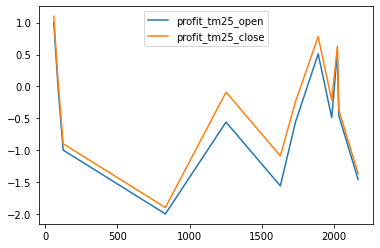

In [14]:
filtered_result_df = segmented_df.loc[
(segmented_df['paper_total_03_loc'] <= 1.60) & (segmented_df['paper_total_loc'] <= 2.13)
]
utils.print_total_under_result(filtered_result_df)